# Machine Learning Assignment 2

### Assignment Objective:

In this assignment You will learn how to use all machine learning algorthms learned so far, this includes: KNN, Decision Tree, Random Forest (Bagging), Boosting (AdaBoost and XGBoost)

The dataset is for predicting lung diseases. The target is the last column "Level" that is a discrete value 'Low', 'Medium', 'High'.

Remember you want to find the best model that is a model where difference between training accuracy and testing accuracy are closest to each other.

## Import libraries:

In [1]:
# Import all libraries needed here:
from google.colab import drive        # Mount Google Drive
drive.mount('/content/drive')

import os                             # Change Directory
os.chdir("drive/My Drive/Datasets")
!pwd                                  # Print out the current directory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

Mounted at /content/drive
/content/drive/My Drive/Datasets


## Read your dataset

In [2]:
cancer = pd.read_csv("cancer patient data sets.csv")
cancer.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Convert target from Categorical to int code:
The target variable is categorical values "Low", "Medium", "High". Convert the target from categorical to int coding using the LabelEncoder method. The target should be: 0 (means Low), 1 (means Medium), or 2 (means High).

In [3]:
scale_mapper = {"Low": 0, "Medium": 1, "High": 2}
d = cancer['Level'].replace(scale_mapper)
cancer = cancer.drop(['Level'], axis=1)
d1 = pd.DataFrame(d)
d1.columns = ['Level']
cancer = pd.concat([cancer, d1], axis=1)
cancer.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2


## Check for missing values

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

## Check for outliers:

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Air Pollution'}>,
        <Axes: title={'center': 'Alcohol use'}>],
       [<Axes: title={'center': 'Dust Allergy'}>,
        <Axes: title={'center': 'OccuPational Hazards'}>,
        <Axes: title={'center': 'Genetic Risk'}>,
        <Axes: title={'center': 'chronic Lung Disease'}>,
        <Axes: title={'center': 'Balanced Diet'}>],
       [<Axes: title={'center': 'Obesity'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Passive Smoker'}>,
        <Axes: title={'center': 'Chest Pain'}>,
        <Axes: title={'center': 'Coughing of Blood'}>],
       [<Axes: title={'center': 'Fatigue'}>,
        <Axes: title={'center': 'Weight Loss'}>,
        <Axes: title={'center': 'Shortness of Breath'}>,
        <Axes: title={'center': 'Wheezing'}>,
        <Axes: title={'center': 'Swallowing Difficulty'}>],


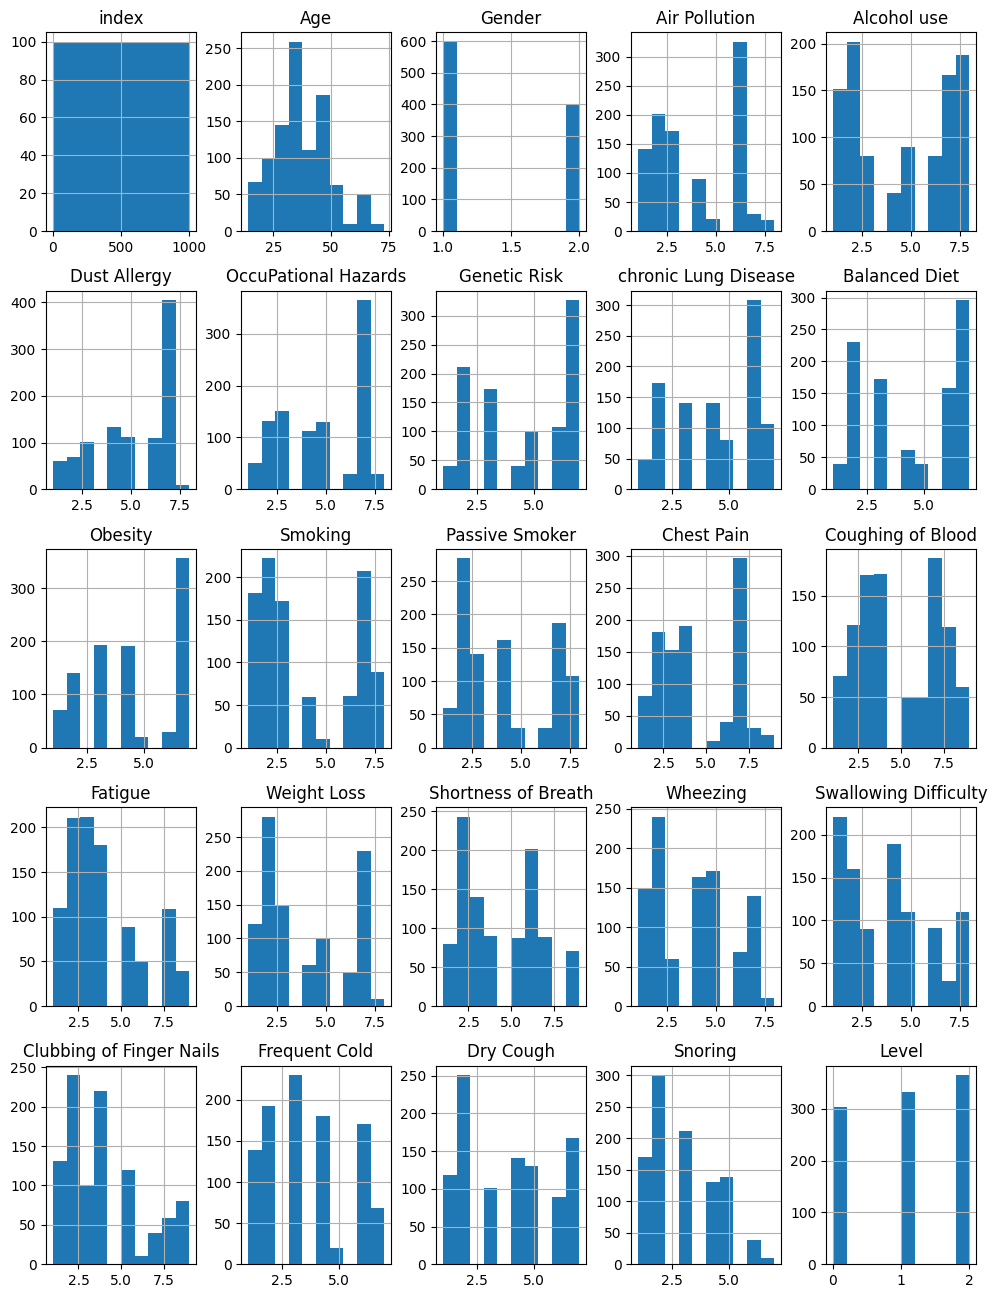

In [5]:
cancer.hist(bins=10, figsize=(12, 16))

In [6]:
def find_anomalies(dataColumn):
  outliers = []

  data_std = dataColumn.std()
  data_mean = dataColumn.mean()

  outlier_cutoff = data_std * 3
  lower_limit = data_mean - outlier_cutoff
  upper_limit = data_mean + outlier_cutoff

  for d in dataColumn:
    if d < lower_limit or d > upper_limit:
      outliers.append(d)

  return outliers

for i in range(2, 25):
  outliers = find_anomalies(cancer[cancer.columns[i]])
  for d in outliers:
    cancer = cancer[cancer.iloc[i] != d]

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

## Data Scaling:

In [7]:
scaler = MinMaxScaler()
scaled_features = ['Age']
scaled_columns = scaler.fit_transform(cancer.loc[:, scaled_features])
cancer[scaled_features] = scaled_columns

cancer.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,0.322034,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,0.050847,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,0.355932,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
3,3,P1000,0.389831,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2
4,4,P101,0.542373,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2


## Extract features X and target y from the dataset:

In [8]:
X = cancer.values[:, 2:-1]
y = cancer.values[:, -1].astype('int')

## Split X and y into X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## KNN:
Use KNN and find the best K-neighbor value:

In [10]:
training_error = []
testing_error = []

for k in range(2, 50, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  yp_training = knn.predict(X_train)
  accuracy_training = accuracy_score(yp_training, y_train)

  yp_testing = knn.predict(X_test)
  accuracy_testing = accuracy_score(yp_testing, y_test)

  training_error.append((k, round(1 - accuracy_training, 5)))
  testing_error.append((k, round(1 - accuracy_testing, 5)))

training_best = []
testing_best = []
lowest_error = 1

for error in training_error:
  if error[1] < lowest_error: training_best = []
  if error[1] <= lowest_error:
    training_best.append(error)
    lowest_error = error[1]

lowest_error = 1

for error in testing_error:
  if error[1] < lowest_error: testing_best = []
  if error[1] <= lowest_error:
    testing_best.append(error)
    lowest_error = error[1]

training_best_k = []
testing_best_k = []

for best in training_best: training_best_k.append(best[0])
for best in testing_best: testing_best_k.append(best[0])

print("Training")
print("--------")
print("Best 'k' = ", training_best_k)
print("Lowest error = ", training_best[0][1], "\n")

print("Testing")
print("--------")
print("Best 'k' = ", testing_best_k)
print("Lowest error = ", testing_best[0][1])

Training
--------
Best 'k' =  [2, 4, 6, 8, 10, 12]
Lowest error =  0.0 

Testing
--------
Best 'k' =  [2, 4, 6, 8, 10, 12]
Lowest error =  0.0


## Decision Tree
Use decision tree and find the best max depth value:

In [11]:
training_error = []
testing_error = []

for d in range(2, 24):
  decisionTree = DecisionTreeClassifier(max_depth=d)
  decisionTree.fit(X_train, y_train)

  yp_training = decisionTree.predict(X_train)
  accuracy_training = accuracy_score(yp_training, y_train)

  yp_testing = decisionTree.predict(X_test)
  accuracy_testing = accuracy_score(yp_testing, y_test)

  training_error.append((d, round(1 - accuracy_training, 5)))
  testing_error.append((d, round(1 - accuracy_testing, 5)))

training_best = []
testing_best = []
lowest_error = 1

for error in training_error:
  if error[1] < lowest_error: training_best = []
  if error[1] <= lowest_error:
    training_best.append(error)
    lowest_error = error[1]

lowest_error = 1

for error in testing_error:
  if error[1] < lowest_error: testing_best = []
  if error[1] <= lowest_error:
    testing_best.append(error)
    lowest_error = error[1]

training_best_d = []
testing_best_d = []

for best in training_best: training_best_d.append(best[0])
for best in testing_best: testing_best_d.append(best[0])

print("Training")
print("--------")
print("Best 'd' = ", training_best_d)
print("Lowest error = ", training_best[0][1], "\n")

print("Testing")
print("--------")
print("Best 'd' = ", testing_best_d)
print("Lowest error = ", testing_best[0][1])

Training
--------
Best 'd' =  [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Lowest error =  0.0 

Testing
--------
Best 'd' =  [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Lowest error =  0.0


## Random Forest:
Use random forest to find the best number of estimators and max depth:

In [15]:
for e in range(1, 200, 10):
  training_error = []
  testing_error = []

  for d in range(2, 24):
    randomForest = RandomForestClassifier(n_estimators=e, max_depth=d)
    randomForest.fit(X_train, y_train)

    yp_training = randomForest.predict(X_train)
    accuracy_training = accuracy_score(yp_training, y_train)

    yp_testing = randomForest.predict(X_test)
    accuracy_testing = accuracy_score(yp_testing, y_test)

    training_error.append((d, round(1 - accuracy_training, 5)))
    testing_error.append((d, round(1 - accuracy_testing, 5)))

  training_best = []
  testing_best = []
  lowest_error = 1

  for error in training_error:
    if error[1] < lowest_error: training_best = []
    if error[1] <= lowest_error:
      training_best.append(error)
      lowest_error = error[1]

  lowest_error = 1

  for error in testing_error:
    if error[1] < lowest_error: testing_best = []
    if error[1] <= lowest_error:
      testing_best.append(error)
      lowest_error = error[1]

  training_best_d = []
  testing_best_d = []

  for best in training_best: training_best_d.append(best[0])
  for best in testing_best: testing_best_d.append(best[0])

  print("Training ('e' = " + str(e) + ")")
  print("--------------------")
  print("Best 'd' = ", training_best_d)
  print("Lowest error = ", training_best[0][1], "\n")

  print("Testing ('e' = " + str(e) + ")")
  print("--------------------")
  print("Best 'd' = ", testing_best_d)
  print("Lowest error = ", testing_best[0][1], "\n")

Training ('e' = 1)
--------------------
Best 'd' =  [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23]
Lowest error =  0.0 

Testing ('e' = 1)
--------------------
Best 'd' =  [7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23]
Lowest error =  0.0 

Training ('e' = 11)
--------------------
Best 'd' =  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Lowest error =  0.0 

Testing ('e' = 11)
--------------------
Best 'd' =  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Lowest error =  0.0 

Training ('e' = 21)
--------------------
Best 'd' =  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Lowest error =  0.0 

Testing ('e' = 21)
--------------------
Best 'd' =  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Lowest error =  0.0 

Training ('e' = 31)
--------------------
Best 'd' =  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Lowest err

## AdaBoost
Use AdaBoost with none in the estimator parameter to find the best value for number of estimators. Use learning_rate = 0.01, Check the website: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [13]:
training_error = []
testing_error = []

for e in range(1, 200, 10):
  adaBoost = AdaBoostClassifier(estimator=None, n_estimators=e, learning_rate=0.01)
  adaBoost.fit(X_train, y_train)

  yp_training = adaBoost.predict(X_train)
  accuracy_training = accuracy_score(yp_training, y_train)

  yp_testing = adaBoost.predict(X_test)
  accuracy_testing = accuracy_score(yp_testing, y_test)

  training_error.append((e, round(1 - accuracy_training, 5)))
  testing_error.append((e, round(1 - accuracy_testing, 5)))

training_best = []
testing_best = []
lowest_error = 1

for error in training_error:
  if error[1] < lowest_error: training_best = []
  if error[1] <= lowest_error:
    training_best.append(error)
    lowest_error = error[1]

lowest_error = 1

for error in testing_error:
  if error[1] < lowest_error: testing_best = []
  if error[1] <= lowest_error:
    testing_best.append(error)
    lowest_error = error[1]

training_best_e = []
testing_best_e = []

for best in training_best: training_best_e.append(best[0])
for best in testing_best: testing_best_e.append(best[0])

print("Training")
print("--------")
print("Best 'e' = ", training_best_e)
print("Lowest error = ", training_best[0][1], "\n")

print("Testing")
print("--------")
print("Best 'e' = ", testing_best_e)
print("Lowest error = ", testing_best[0][1])

Training
--------
Best 'e' =  [161, 171, 181, 191]
Lowest error =  0.01 

Testing
--------
Best 'e' =  [161, 171, 181, 191]
Lowest error =  0.01


## XGBoost:
Use the slides that uses XGBoost. To install XGBoost, use: pip install xgboost



In [14]:
xgBoost = xgb.XGBClassifier()
xgBoost.fit(X_train, y_train)

yp_training = xgBoost.predict(X_train)
accuracy_training = accuracy_score(yp_training, y_train)

yp_testing = xgBoost.predict(X_test)
accuracy_testing = accuracy_score(yp_testing, y_test)

print("Training")
print("--------")
print("Error =", round((1 - accuracy_training), 5), "\n")

print("Testing")
print("--------")
print("Error =", round((1 - accuracy_testing), 5), "\n")

Training
--------
Error = 0.0 

Testing
--------
Error = 0.0 

